In [1]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle, Circle
from PIL import Image
from mtcnn.mtcnn import MTCNN
import sys
import numpy as np
import os
import glob
image01 = './myimages/joli8.jpeg' # angelina jolie
image02 = './myimages/af1.jpeg' # african
image03 = './myimages/1.jpg' # Amin
image04 = './myimages/1/dog2.jpeg' # Animals
image05 = './myimages/1/cat1.jpeg' # Animals
image06 = './myimages/1/gorilla2.jpeg' # Animals
image07 = './test/test1.jpg' # human with animals
image08 = './myimages/dog.jpeg' # dog face (not human face)
image09 = './myimages/gorilla1.jpeg' # gorilla face (not human face)
image10 = './myimages/dog-test2.jpeg' # dog face (not human face)
image11 = './myimages/dog-test1.jpeg' # dog face (not human face)

# Introduction

Haar-cascade classifiers proposed by Viola and Jones are known as the first method to perform face detection. Nowadays, Convolutional Neural Network (CNN) is the most popular usage of deep learning models in variety of computer vision tasks such as face detection, face recognition and image classification.  

Multi-Task Cascaded Convolutional Neural Network (MTCNN) is one of the most famous CNN models to perform face detection. Face detection as well as face alignment are done jointly using MTCNN in a multi-task training fashion. 

MTCNN consist of three stages. In the first stage, it produces candidate windows quickly through a shallow CNN. Then, it refines the windows by rejecting many non-faces windows through the second CNN. Finally, another CNN model is utilized to refine the result again and output five facial landmarks positions.  

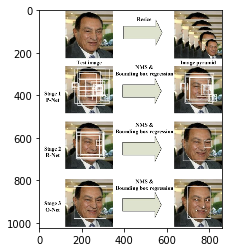

In [5]:
image = '/Users/amin.oroji/Documents/Einnity/Paper 2/mtcnn-0.png'
pixels = pyplot.imread(image)
pyplot.imshow(pixels)
pyplot.show()

# MTCNN Three Main Steps

**Stage 1**: A fully convolutional network, called
Proposal Network (P-Net), to obtain the candidate facial windows and their bounding box regression vectors. P-Net consist of three convolutional layer Then candidates are calibrated based on the estimated bounding box regression vectors. After that, we employ non-maximum suppression (NMS) to merge highly overlapped candidates. 

**Stage 2**: All candidates are fed to another CNN, called Refine Network (R-Net), which further rejects a large number of false candidates, performs calibration with bounding box regression, and conducts NMS. R-Net consist of 3 convolutional layer along with a fully connected layer.

**Stage 3**: This stage is similar to the second stage, but in this
stage we aim to identify face regions with more supervision. The model has four convolutional layer together with a fully connected layer. In
particular, the network will output five facial landmarks’ positions. 

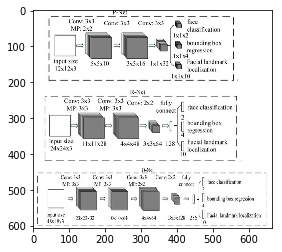

In [6]:
image = '/Users/amin.oroji/Documents/Einnity/Paper 2/mtcnn-1.png'
pixels = pyplot.imread(image)
pyplot.imshow(pixels)
pyplot.show()

# MTCNN in Practice

Face detection is the first step of any facial recognition system. During model selection step, I choose MTCNN as it is fast and accurate. To perform face dtection using python, one need to import MTCNN instance and create detecor. Then detect_faces method is utilized to extract the location of faces, eyes, nose and mouth. The output is a dictionary which containes the face location ('box'), the confidence that the detected object is a face ('confidence') and the location of eyes, nose and mouth ('keypoints').
Lets start.

## Necesary Libraries

First, necessary libraries are imported.

In [7]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle, Circle
from PIL import Image
from mtcnn.mtcnn import MTCNN
import sys
import numpy as np
import os
import glob

## Creating MTCNN detector

Then an instance of MTCNN model is created

In [8]:
detector = MTCNN()

W0115 10:00:20.547589 4570785216 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0115 10:00:20.567716 4570785216 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0115 10:00:20.613836 4570785216 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0115 10:00:20.615111 4570785216 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0115 10:00:20.619014 4570785216 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/mtcnn/layer_factory.py:79: The name tf.get_variab

As mentioned above the output of model contans the face and key points locations along with the confidence value.

[{'box': [77, 54, 68, 87],
  'confidence': 0.9999995231628418,
  'keypoints': {'left_eye': (105, 87),
   'right_eye': (136, 88),
   'nose': (127, 110),
   'mouth_left': (106, 122),
   'mouth_right': (131, 124)}}]

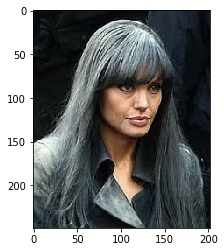

In [9]:
pixels = pyplot.imread(image01)
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
results = detector.detect_faces(pixels)
results

## Face Detection with Basic MTCNN

Here we are going to create a python function to detect faces in a given image. To this end we must apply following steps:
- load an image from a file
- utilize the detector to detect all faces in the image
- return the detected location in the image


In [10]:
def detect_face_basic(filename):
    #load image from file
    pixels = pyplot.imread(filename)
    pyplot.imshow(pixels)
    # get the context for drawing boxes
    ax = pyplot.gca()
    #detect faces in the image
    results = detector.detect_faces(pixels)
    for result in results:
        x, y, width, height = result['box']
        keypoints = result['keypoints']
        #create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        circ1 = Circle(keypoints['left_eye'], 3, color='blue')
        circ2 = Circle(keypoints['right_eye'], 3, color='blue')
        circ3 = Circle(keypoints['nose'], 3, color='yellow')
        circ4 = Circle(keypoints['mouth_left'], 3, color='green')
        circ5 = Circle(keypoints['mouth_right'], 3, color='green')
        # draw the box
        ax.add_patch(rect)
        ax.add_patch(circ1)
        ax.add_patch(circ2)
        ax.add_patch(circ3)
        ax.add_patch(circ4)
        ax.add_patch(circ5)
    #show the plot
    pyplot.show()

### Results

To test the performance of my function, I am going to apply my function on the following images.

In [11]:
image01 = './myimages/joli8.jpeg' # angelina jolie
image02 = './myimages/af1.jpeg' # african
image03 = './myimages/1.jpg' # Amin
image04 = './myimages/1/dog2.jpeg' # Animals
image05 = './myimages/1/cat1.jpeg' # Animals
image06 = './myimages/1/gorilla2.jpeg' # Animals
image07 = './test/test1.jpg' # human with animals
image08 = './myimages/dog.jpeg' # dog face (not human face)
image09 = './myimages/gorilla1.jpeg' # gorilla face (not human face)
image10 = './myimages/dog-test2.jpeg' # dog face (not human face)
image11 = './myimages/dog-test1.jpeg' # dog face (not human face)

First 

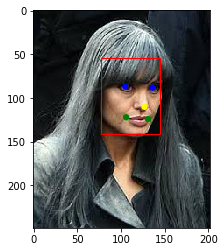

In [12]:
detect_face_basic(image01)

sounds good.

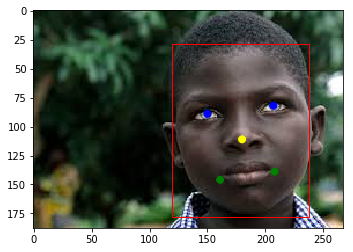

In [13]:
detect_face_basic(image02)

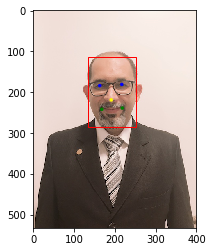

In [14]:
detect_face_basic(image03)

In our application, the aim is to detect just human faces. So let's apply the function on animals faces. In this test case, I use a dog, a cat and a gorilla image and apply my function on those images.

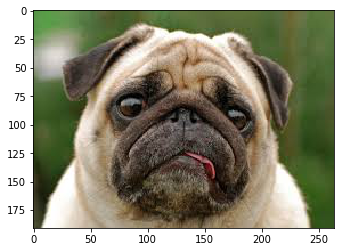

In [15]:
detect_face_basic(image04)

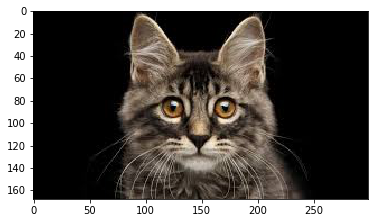

In [16]:
detect_face_basic(image05)

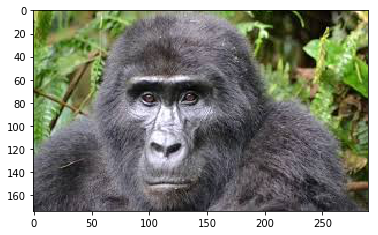

In [17]:
detect_face_basic(image06)

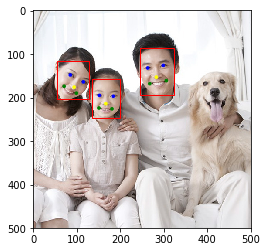

In [18]:
detect_face_basic(image07)

Surprisingly, model is able to detect human faces and ignore the dog face in the last image.

## False Positive Example

As mention, it is very critical for us to detect only human face in our application. during my research I could find some false positive examples shown below:

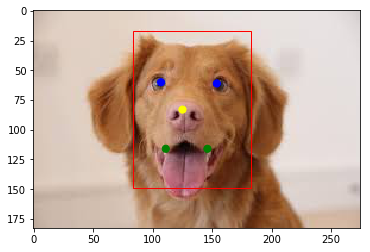

In [19]:
detect_face_basic(image08)

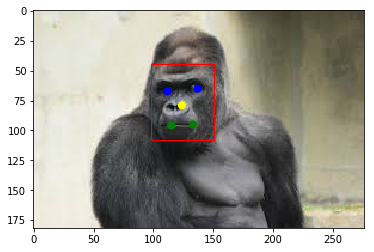

In [20]:
detect_face_basic(image09)

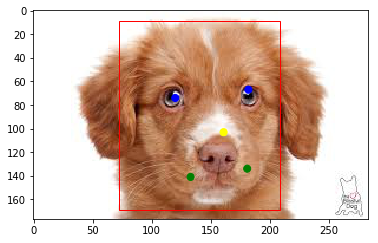

In [21]:
detect_face_basic(image10)

## How to Set Confidence Value

The main question now is " How can we make sure that our function just detect human faces?". To this end, I first collect some image data including animals and human images. Then I used face detector on those images and analyze the confidence value.

In [22]:
Ref_Pics_Path='./myimages/'
images1 = (glob.glob(Ref_Pics_Path + "*.*"))
images = [image[11:] for image in images1]

In [23]:
pixels = [pyplot.imread(image) for image in images1]
len(pixels)

68

In [24]:
results = []
for i in range(len(pixels)):
    a = detector.detect_faces(pixels[i])
    if a != []:
        results.append((images[i],a[0]['confidence']))

In [25]:
import pandas as pd
df = pd.DataFrame(results, columns=['Image', 'Confidence'])

df.sort_values('Confidence').head(10)

,Image,Confidence
31,dog-test2.jpeg,0.841822
28,gorilla1.jpeg,0.913521
24,dog.jpeg,0.976554
20,joli21.jpeg,0.984447
45,joli12.jpeg,0.992286
22,angelina-jolie759.jpg,0.993296
27,joli14.jpeg,0.998206
30,joli18.jpeg,0.998602
46,2.jpg,0.999114
6,joli42.jpg,0.999136


In [26]:
df.sort_values('Confidence', ascending = False).head(10)

,Image,Confidence
40,af2.jpeg,1.000000
21,oa1.jpeg,1.000000
33,joli19.jpeg,1.000000
14,joli8.jpeg,1.000000
15,joli20.jpeg,0.999999
36,joli15.jpeg,0.999999
9,goh-test3.jpeg,0.999998
29,af4.jpeg,0.999997
51,3.jpg,0.999996
16,tom.jpg,0.999996


In [27]:
df['Confidence'].describe()

count    57.000000
mean      0.994546
std       0.023796
min       0.841822
25%       0.999482
50%       0.999885
75%       0.999992
max       1.000000
Name: Confidence, dtype: float64

According to the statistical characteristics of `Confodenc` column, we decide to set the confidence thershold equals to 0.999.

## Improving MTCNN

In this section, we improve the basic face detection function by adding a check on the confidence value. Then the new function is applied on the animals image.

In [28]:
def detect_face_improved(filename, confidence = 0.999):
    # load image from file
    pixels = pyplot.imread(filename)
    pyplot.imshow(pixels)
    ax = pyplot.gca()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    for result in results:
        if (result['confidence'] > confidence):
            x, y, width, height = result['box']
            keypoints = result['keypoints']
            rect = Rectangle((x, y), width, height, fill=False, color='green')
            circ1 = Circle(keypoints['left_eye'], 3, color='blue')
            circ2 = Circle(keypoints['right_eye'], 3, color='blue')
            circ3 = Circle(keypoints['nose'], 3, color='red')
            circ4 = Circle(keypoints['mouth_left'], 3, color='green')
            circ5 = Circle(keypoints['mouth_right'], 3, color='green')
            # draw the box
            ax.add_patch(rect)
            ax.add_patch(circ1)
            ax.add_patch(circ2)
            ax.add_patch(circ3)
            ax.add_patch(circ4)
            ax.add_patch(circ5)
    pyplot.show()


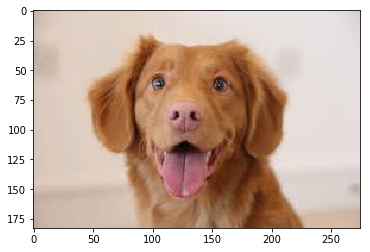

In [29]:
detect_face_improved(image08)

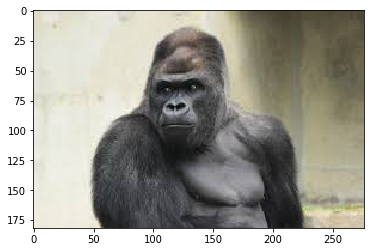

In [30]:
detect_face_improved(image09)

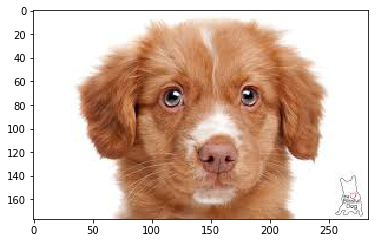

In [31]:
detect_face_improved(image10)

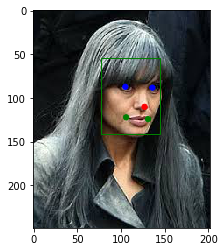

In [32]:
detect_face_improved(image01)

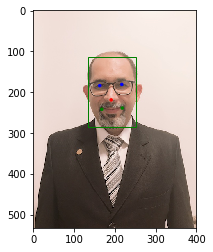

In [33]:
detect_face_improved(image03)

## References

- https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
- http://users.eecs.northwestern.edu/~xsh835/assets/cvpr2015_cascnn.pdf
- https://arxiv.org/pdf/1910.06261.pdf
- https://towardsdatascience.com/face-detection-with-deep-learning-using-multi-tasked-cascased-cnn-8721435531d5
- https://towardsdatascience.com/how-does-a-face-detection-program-work-using-neural-networks-17896df8e6ff
- https://medium.com/nodeflux/the-evolution-of-computer-vision-techniques-on-face-detection-part-2-4af3b22df7c2
- 